# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np #numerical computations. large, multi-dimensional arrays and matrices
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #
from statsmodels.graphics.correlation import plot_corr
import seaborn as sns #data visualization library provides a high-level interface for creating statistical graphics
import random
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression #work with a classification algorithm like Logistic Regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('./df_train.csv') #Load the train CSV file into a pandas DataFrame

In [3]:
test_df = pd.read_csv('./df_test.csv')

In [4]:
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [5]:
test_df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
#look at data statistics
df.shape

(8763, 49)

In [7]:
df.describe() 

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [8]:
#The info command confirms our categorical and numerical features. outputs the number of non-null entries in each column.
#As such, we can be certain that our data has missing values if columns have a varying number of non-null entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

time, Valencia_wind_deg, and Seville are object types, hence, are non-numeric which may have to be changed in data engineering section. 

In [9]:
df.isnull().sum() #provide the total number of null values appearing in each feature. basically opposite of df.info

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [10]:
df.mode()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,1.0,level_1,0.0,1.0,93.0,93.0,0.0,1.0,...,282.15,287.15,284.15,297.988,288.15,288.15,289.15,278.150,273.15,-537.333333
1,1,2015-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,283.15,NaN,NaN,NaN,NaN,NaN,NaN,292.138,NaN,1203.666667
2,2,2015-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4144.000000
3,3,2015-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6089.666667
4,4,2015-01-01 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6401.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,8759,2017-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8760,8760,2017-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8761,8761,2017-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Entries with high negative skew are: Valencia_pressure, Madrid_pressure, (and Bilbao_weather_id, Madrid_weather_id and Barcelona_weather_id). Those with high positive skew are: Bilbao_rain_1h, Valencia_wind_speed, Bilbao_snow_3h, Seville_rain_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h)

In [12]:
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Features with high kurtosis i.e. >3, implying a large number of outliers are: Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, (Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, are IDs relevant in distribution study)

Entries with high skewness often correspond with values with high kurtosis indicating non-normally distributed. These entries would either be replaced or dropped in data emgineering section.

In [13]:
# plot relevant feature interactions

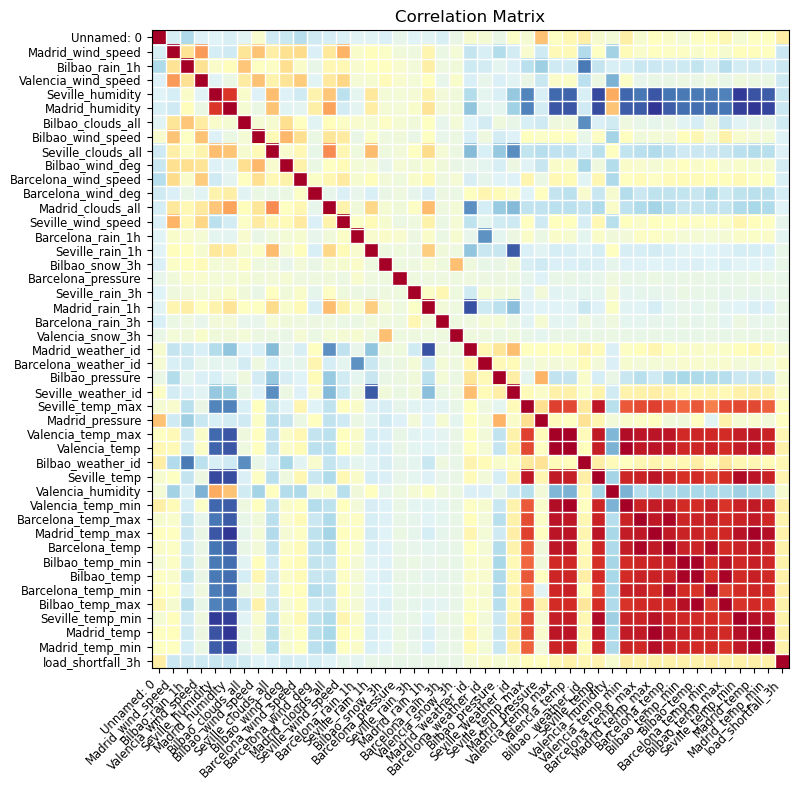

In [14]:
# evaluate correlation

#evaluate correlation
corr = df.drop('Valencia_pressure', axis='columns').corr()
fig, ax = plt.subplots(figsize=(10, 8))  
plot_corr(corr, xnames=corr.columns, ax=ax)
plt.show()


Strongest correlations, and therefore, most influential features on energy production are min/max temperature of the cities. Wind speed, wind degrees, pressure, rain, snow and cloud cover have less influence (bottom right correlations in matrix)

In [15]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [16]:
# remove missing values/ features
#for each change to the df (train) there are identical changes to the test_df underneath 

In [17]:
# Calculate the percentage of null values in the 'Valencia_pressure' column
null_percentage = df['Valencia_pressure'].isna().mean() * 100
print("Percentage of Null Values in Valencia_pressure:", null_percentage)

Percentage of Null Values in Valencia_pressure: 23.59922401004222


In [18]:
null_percentage = test_df['Valencia_pressure'].isna().mean() * 100
print("Percentage of Null Values in Valencia_pressure:", null_percentage)

Percentage of Null Values in Valencia_pressure: 15.547945205479452


Mean: You should consider using the mean (average) to replace null values when your data is approximately normally distributed. This means that the data is symmetric and bell-shaped. The mean can be sensitive to extreme outliers, so if your data has significant outliers, it might not be the best choice.

Median: The median is a robust statistic that is less affected by extreme values or outliers. You should consider using the median to replace null values when your data is skewed or has outliers. If your data has a non-normal distribution, the median can be a more representative measure of central tendency.

will replace Valencia_pressure null values with median Value if the nulls encompass less than 30% of the whole column


In [19]:
# Calculate the median of the 'Valencia_pressure' column
median_valencia_pressure = df['Valencia_pressure'].median()

In [20]:
median_valencia_pressure = test_df['Valencia_pressure'].median()

In [21]:
# Replace null values with the median
df['Valencia_pressure'].fillna(median_valencia_pressure, inplace=True)

In [22]:
test_df['Valencia_pressure'].fillna(median_valencia_pressure, inplace=True)

In [23]:
# create new features
#create temp range for each city using temp max and min 
df['Madrid_temp_range'] = df['Madrid_temp_max'] - df['Madrid_temp_min']
df['Valencia_temp_range'] = df['Valencia_temp_max'] - df['Valencia_temp_min']
df['Seville_temp_range'] = df['Seville_temp_max'] - df['Seville_temp_min']
df['Bilbao_temp_range'] = df['Bilbao_temp_max'] - df['Bilbao_temp_min']
df['Barcelona_temp_range'] = df['Barcelona_temp_max'] - df['Barcelona_temp_min']


In [24]:
test_df['Madrid_temp_range'] = test_df['Madrid_temp_max'] - test_df['Madrid_temp_min']
test_df['Valencia_temp_range'] = test_df['Valencia_temp_max'] - test_df['Valencia_temp_min']
test_df['Seville_temp_range'] = test_df['Seville_temp_max'] - test_df['Seville_temp_min']
test_df['Bilbao_temp_range'] = test_df['Bilbao_temp_max'] - test_df['Bilbao_temp_min']
test_df['Barcelona_temp_range'] = test_df['Barcelona_temp_max'] - test_df['Barcelona_temp_min']

In [25]:
# Convert 'time' to datetime type
df['time'] = pd.to_datetime(df['time'])


In [26]:
test_df['time'] = pd.to_datetime(test_df['time'])

In [27]:
# Extract year, month, day, and hour as separate features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

In [28]:
test_df['year'] = test_df['time'].dt.year
test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day
test_df['hour'] = test_df['time'].dt.hour

In [29]:
# Extract only the last number from values and change the column to a numeric type
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)', expand=False).astype(float)


In [30]:
test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].str.extract('(\d+)', expand=False).astype(float)

In [31]:
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)', expand=False).astype(float)

In [32]:
test_df['Seville_pressure'] = test_df['Seville_pressure'].str.extract('(\d+)', expand=False).astype(float)

In [33]:
#SANITY CHECK
print(df.dtypes)

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg              float64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure               float64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [34]:
#SANITY CHECK
print(test_df.dtypes)

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg              float64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure               float64
Seville_rain_1h                float64
Bilbao_snow_3h                   int64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h                 int64
Madrid_weather_id        

In [35]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [36]:
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,load_shortfall_3h,Madrid_temp_range,Valencia_temp_range,Seville_temp_range,Bilbao_temp_range,Barcelona_temp_range,year,month,day,hour
0,0,2015-01-01 03:00:00,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,6715.666667,0.000000,0.0,0.000000,0.000000,0.000000,2015,1,1,3
1,1,2015-01-01 06:00:00,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,4171.666667,0.000000,0.0,0.000000,0.000000,0.000000,2015,1,1,6
2,2,2015-01-01 09:00:00,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,4274.666667,0.000000,0.0,0.000000,0.000000,0.000000,2015,1,1,9
3,3,2015-01-01 12:00:00,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,5075.666667,0.000000,0.0,0.000000,0.000000,0.000000,2015,1,1,12
4,4,2015-01-01 15:00:00,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,6620.666667,0.000000,0.0,0.000000,0.000000,0.000000,2015,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,6.0,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,-28.333333,2.333333,0.0,0.666667,5.000000,1.666667,2017,12,31,9
8759,8759,2017-12-31 12:00:00,5.000000,6.0,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,2266.666667,3.333333,0.0,1.333333,4.666667,0.666667,2017,12,31,12
8760,8760,2017-12-31 15:00:00,6.333333,9.0,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,822.000000,4.000000,0.0,2.333333,3.000000,1.333333,2017,12,31,15
8761,8761,2017-12-31 18:00:00,7.333333,8.0,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,-760.000000,2.666667,0.0,2.333333,5.333333,1.333333,2017,12,31,18


In [37]:
# split data
#Split the data into features (X) and target (y)
X = df.drop(columns=['time', 'load_shortfall_3h'])  # Features (exclude the target)
y = df['load_shortfall_3h']  # Target variable

In [38]:
# create targets and features dataset
#Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

The line X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) is splitting your data into training and validation sets. Let's break down this line step by step:

X and y are your feature matrix and target variable, respectively. X contains the features you'll use to make predictions, and y contains the corresponding target values (in this case, load_shortfall_3h).

train_test_split() is a function provided by scikit-learn (a popular machine learning library) that is used to split a dataset into training and validation subsets.

The function takes the following arguments:

X: The feature matrix (independent variables).
y: The target variable (dependent variable).
test_size: This parameter specifies the proportion of the data that should be used for the validation set. In this case, it's set to 0.2, meaning 20% of the data will be used for validation, and the remaining 80% for training.
random_state: This is a seed for the random number generator used in the data splitting process. Setting this to a specific value (e.g., 42) ensures that the split is reproducible. If you use the same value later, you'll get the same split when you run the code again.
train_test_split() returns four sets of data:

X_train: This contains the feature data for the training set.
X_val: This contains the feature data for the validation set.
y_train: This contains the target data for the training set.
y_val: This contains the target data for the validation set.
By splitting the data into training and validation sets, you can train your machine learning model on a portion of the data (X_train and y_train) and evaluate its performance on another portion that it hasn't seen during training (X_val and y_val). This allows you to estimate how well your model is likely to perform on unseen data. The random state ensures that the data split remains consistent across different runs of your code, making your results reproducible.

In [39]:
# create one or more ML models
model = LinearRegression()

In [40]:
# Train the model on the training data

model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Make predictions on the validation set
y_pred = model.predict(X_valid)
y_pred

array([12024.08838165, 11723.37058216,  9705.09789032, ...,
        8893.32284391, 12660.43206346,  7827.98992825])

In [42]:
# evaluate one or more ML models
# Evaluate the accuracy of the ML model
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 4800.930794000735


In [43]:
# Exclude the 'time' column from the test data
X_test = test_df.drop(columns=['time'])

# Make predictions on the test data
test_predictions = model.predict(X_test)

test_predictions

array([ 7751.5078814 ,  7379.13382155,  8522.0453015 , ...,
       14271.15132082, 13797.15669727, 12359.76767612])

In [44]:
# Extract the 'time' column from the test data
submission_time = test_df['time']

# Create a DataFrame with 'time' and 'load_shortfall_3h' columns
first_submission_df = pd.DataFrame({
    'time': test_df['time'],
    'load_shortfall_3h': test_predictions
})

# Export the submission DataFrame to a CSV file
first_submission_df.to_csv('first_submission.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [45]:
# Compare model performance

In [46]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [47]:
# discuss chosen methods logic